# 배달

## 문제
N개의 마을로 이루어진 나라 존재. 이 나라의 각 마을에는 1부터 N까지의 번호가 각각 하나씩 부여되어 있음. 각 마을은 양방향으로 통행할 수 있는 도로로 연결되어 있는데, 서로 다른 마을 간에 이동할 때는 이 도로를 지나야 함. 도로를 지날 때 걸리는 시간은 도로별로 다름. 현재 1번 마을에 있는 음식점에서 각 마을로 음식 배달을 하려고 함. 각 마을로부터 음식 주문을 받으려고 하는데, N개의 마을 중에서 K 시간 이하로 배달이 가능한 마을에서만 주문을 받으려고 함. 마을의 개수 N, 각 마을을 연결하는 도로의 정보 road, 음식 배달이 가능한 시간 K가 매개변수로 주어질 때, 음식 주문을 받을 수 있는 마을의 개수를 return
<br><br>
input : N = 정수, road = 이차원 정수 배열, K = 정수, output : 정수

#### <조건>
 - 마을의 개수 N은 1 이상 50 이하의 자연수
 - road의 길이(도로 정보의 개수)는 1 이상 2,000 이하
 - road의 각 원소는 마을을 연결하고 있는 각 도로의 정보
 - road는 길이가 3인 배열이며, 순서대로 (a, b, c)를 나타냄
   - a, b(1 ≤ a, b ≤ N, a != b)는 도로가 연결하는 두 마을의 번호이며, c(1 ≤ c ≤ 10,000, c는 자연수)는 도로를 지나는데 걸리는 시간
   - 두 마을 a, b를 연결하는 도로는 여러 개가 있을 수 있음
   - 한 도로의 정보가 여러 번 중복해서 주어지지 않음
 - K는 음식 배달이 가능한 시간을 나타내며, 1 이상 500,000 이하
 - 임의의 두 마을간에 항상 이동 가능한 경로가 존재
 - 1번 마을에 있는 음식점이 K 이하의 시간에 배달이 가능한 마을의 개수를 return
 
#### <예시>
input : N = 5, road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]], K = 3
<br><br>
result : 4
<br><br>
 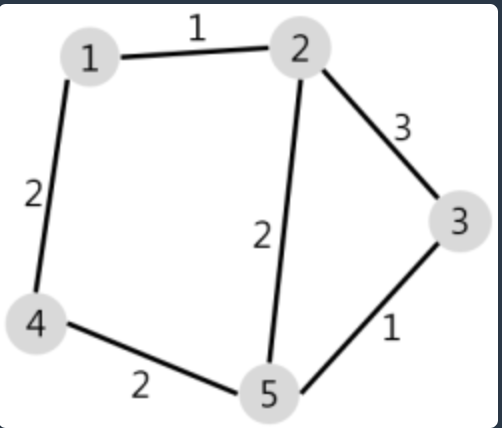
 - 위 그림에서 1번 마을에 있는 음식점은 [1, 2, 4, 5] 번 마을까지는 3 이하의 시간에 배달가능
 - 그러나 3번 마을까지는 3시간 이내로 배달할 수 있는 경로가 없으므로 3번 마을에서는 주문을 받지 않음
 - 따라서 1번 마을에 있는 음식점이 배달 주문을 받을 수 있는 마을은 4개
 
https://programmers.co.kr/learn/courses/30/lessons/12978

## 풀이
 - 주어진 road의 인접한 노드와 가중치를 이중 딕셔너리를 이용해서 road_dict에 저장
 - 이때, 같은 노드사이에 도로가 2개 존재할 수 있기에 내림차순으로 정렬해줘서 딕셔너리를 만들때 작은 수가 최종적으로 저장되게 함
 - 각 노드 별로 걸리는 배달 시간을 distance에 딕셔너리 형태로 저장 처음에는 0 으로 초기화
 - dijkstra알고리즘 활용
   - 우선순위 큐를 이용해서 처음 출발지인 1을 queue에 넣어줌
   - queue에 데이터가 있는 동안은 아래의 코드를 반복
     - heappop을 통해서 현재 선택된 노드와 거리를 저장
     - 현재 노드에 연결된 노드를 for문을 통해서 체크
     - 만약 다음에 갈 노드와 연결된 도로의 수를 더했을 때 기존에 저장된 시간보다 짧다면 갱신해주고 queue에 다음에 갈 노드로 저장
 - queue가 빌 때까지 반복을 해주고 나온 각 노드의 최단 시간에서 K보다 짧은 시간이 걸린 노드의 개수만 return

In [1]:
import heapq

def solution(N, road, K):
    road_dict = dict()
    road = sorted(road, key = lambda x: x[-1], reverse=True)
    distance = {i+1: 0 for i in range(N)}
    
    for i in road:
        if i[0] in road_dict:
            road_dict[i[0]][i[1]] = i[-1]
        else:
            road_dict[i[0]] = {i[1]: i[-1]}
            
        if i[1] in road_dict:
            road_dict[i[1]][i[0]] = i[-1]
        else:
            road_dict[i[1]] = {i[0]: i[-1]}
            
    return dijkstra(road_dict, K, distance)

def dijkstra(road_dict, K, distance):
    queue = []
    heapq.heappush(queue, [1, distance[1]])
    
    while queue:
        cur_node, cur_dist = heapq.heappop(queue)
        
        for next_node, next_dist in road_dict[cur_node].items():
            if cur_dist + next_dist < distance[next_node] or distance[next_node] == 0:
                distance[next_node] = cur_dist + next_dist
                heapq.heappush(queue, [next_node, cur_dist + next_dist])       
    
    return len([key for key, value in distance.items() if key != 1 and value <= K]) + 1

In [2]:
N = 6
road = [[1, 2, 1], [1, 3, 2], [2, 3, 2], [3, 4, 3], [3, 5, 2], [3, 5, 3], [5, 6, 1]]
K = 4

solution(N, road, K)

4